## make ball and write numpy trajectory values

In [1]:
"""
# ipython_exit.py
Allows exit() to work if script is invoked with IPython without
raising NameError Exception. Keeps kernel alive.

Use: import variable 'exit' in target script with
     'from ipython_exit import exit'    
"""

import sys
from io import StringIO
from IPython import get_ipython


class IpyExit(SystemExit):
    """Exit Exception for IPython.

    Exception temporarily redirects stderr to buffer.
    """
    def __init__(self):
        # print("exiting")  # optionally print some message to stdout, too
        # ... or do other stuff before exit
        sys.stderr = StringIO()

    def __del__(self):
        sys.stderr.close()
        sys.stderr = sys.__stderr__  # restore from backup


def ipy_exit():
    raise IpyExit


if get_ipython():    # ...run with IPython
    exit = ipy_exit  # rebind to custom exit
else:
    exit = exit      # just make exit importable

In [ ]:
import vpython
from vpython import *

In [ ]:
# import vpython
# from vpython import *
# from vpython.no_notebook import stop_server
import time
# stop_server()
# from  vpython import * 
import random 
import numpy as np 
import json 
print('start') 
local_path = './data/txt/' 
json_file = 'custom_json.json' 
obj_file = f'{local_path}3dtr.obj'
np_file = f'{local_path}pointsNumpy1'

res_json = {} 
ball_id = 0 
total_frame = 0 
velocity = 0 
angle_degrees =0 
ball_initial_pos = 0 


# Define a function to carry out 1 animation frame. 
def animate(): 
  # Calcualte the force(s) on the ball. 
    grav = -ball.mass * gravity * yhat 
    relative_velocity = ball.velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    ball.force = grav + drag 
    # Calculate the ball's acceleration. 
    ball.acceleration = ball.force / ball.mass 
    # Update the ball's velocity. 
    ball.velocity = ball.velocity + ball.acceleration * dt 
    # Update the ball's position. 
    ball.pos = ball.pos + ball.velocity * dt 
    # Exit this function. 
    return drag, grav 
 
def animate2(): 
  # Calcualte the force(s) on the ball. 
    grav = -mass * gravity * yhat 
    relative_velocity = velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    force = grav + drag 
    # Calculate the ball's acceleration. 
    acceleration = force / mass 
    # Update the ball's velocity. 
    velocity = velocity + acceleration * dt 
    # Update the ball's position. 
    pos = pos + velocity * dt 
    # Exit this function. 
    return drag, grav 

drag_coeff = 15 
 
head_wind_x = -8  # -4 
head_wind_y = 0 
head_wind_z = 1  # 4 
head_wind = vector(head_wind_x,head_wind_y,head_wind_z) 
################################################################ 
# Create a ball. 
ball = sphere(make_trail=True,radius=0.5, color=color.yellow) 
ground = box(pos=vector(0,0,0), size=vector(450,0.02,250),  color=color.green) 
 
# Set the ball's initial conditions and properties. 
# ball.velocity, ball.pos 
ball.mass = 1100 # in kg 
gravity = 5.0 # in newtons / kg 
yhat = vector(0,1,0) # (x-component, y-component, z-component) 

v_x, v_y, v_z = (45, 25, 1)
####################################################
ball.velocity = vector(v_x, v_y, v_z) # in meters / second (50,24,2) 
ball.pos = vector(0,0,0) # in meters 
initial_x = ball.pos.x 
initial_y = ball.pos.y 
initial_z = ball.pos.z 
 
ball_initial_pos = [ball.pos.x, ball.pos.y, ball.pos.z] 
 
 
 
max_height = ball.pos.y 
distance = ball.pos.x 
 
# Set up the animation loop. 
dt = 0.001 # in seconds 
time = 0 # in seconds 

ball_id = 0 
 
points = [] 
# Animate in a loop. 
number_of_positions = 0 
total_frame = number_of_positions 
res_json["parabola"] = [ ] 
res_json["ball_move"] = [] 
res_json["time"] = [] 
res_json["ball_gravity_force"] = [] 
res_json["ball_acceleration"] = [] 
res_json["relative_velocity2"] = [] 
res_json["ball_velocity"] = [] 
res_json["gravity force"] = [] 
# if head_wind_z  > ball_initial_pos[2] or  head_wind_z  - ball_initial_pos[2] >=-100 : 
f = open(obj_file, 'w') 
while ball.pos.y >=0 : # Run while this condition is true. 
# Indented means "in the loop" 
    rate(1000) # Frames per second. 
    animate() 
    number_of_positions+=1 
    # Find maximum height. 
    max_height = max(max_height,ball.pos.y) 
    distance = max(distance,ball.pos.x) 
    # Update time. 
    time = time + dt 

    res_json["parabola"].append([ball.pos.x, ball.pos.y, ball.pos.z]) 
#     res_json["parabola"].append(ball.pos) 
    res_json["ball_move"].append(ball.pos.x-initial_x) 
    res_json["time"].append(time)

    points.append([ball.pos.x, ball.pos.y, ball.pos.z]) 
    f.write(f'v {ball.pos.x} {ball.pos.y} {ball.pos.z} {200} {200} {200}\n') 



 
arrPoints = np.array(points) 
np.save(np_file, arrPoints) 
#...
print('number of positions: ', number_of_positions) 
print('max height ', max_height) 
print('distance ', distance) 
 
res_json["Id"] = ball_id 
res_json["total_frame"] = total_frame 
res_json["velocity"] = velocity 
res_json["impact_angle"] = angle_degrees 
res_json["init_ball_position"] = ball_initial_pos 
res_json["frame_num"] = {} 
res_json["last_center"] = 0 
# res_json["head_wind"] = head_wind 
res_json["max_height"] = max_height 
res_json["gravity"] = gravity 

f.close() 
with open(local_path + json_file, "w") as f: 
    json.dump(res_json, f, indent="\t") 
    
print('done')

# vpython.no_notebook.__server.shutdown()
# vpython.no_notebook
# stop_server()
exit()

In [ ]:
jupyter notebook stop 8888

In [ ]:
from vpython import *
# import vpython as vp

In [ ]:
import sys
print('fi')
# sys.exit()
exit()

## read pose info and find ball start and end points 

In [4]:
import json
import math
import cv2
import os 
file = "./data/res/alphapose-results.json" #./data/txt/alphapose-results.json"
path = './data/res/vis/'



ball_center = [[536, 1054]]
ball_c_y = ball_center[0][1]
ball_c_x = ball_center[0][0]
ball_center = ball_center[0]
end_pointls = []
start_pointls = []
listt = []
tr_angles = []
# for root, dr, files in os.walk(path):
#     print('root ', root, 'dir ', dr, 'files', files)
with open(file, "r") as f: 
    json_f = json.load(f)

for idx, i in enumerate(json_f):
    im3_path = path + i["image_id"]
    im3 = cv2.imread(im3_path)
    im3_shape = im3.shape
    print('image shape ',im3_shape)
    
    ball_center = i["ball_center"]
    print(ball_center)
    # pose infos 
    print(i["image_id"])
    print('.....................')
    
    # person center: calculate middle x point between right and left ankles
    av_ank_point = abs(i["keypoints"][48] - i["keypoints"][45]) / 2 + min(i["keypoints"][45],i["keypoints"][48])
    
    # calculate distance between right knee and ankle for ratio
    difx = abs(i["keypoints"][42] - i["keypoints"][48]) # kneeX - ankleX 
    dify = abs(i["keypoints"][43] - i["keypoints"][49]) # kneeY - ankleY 
    dif_c = math.sqrt(difx**2+dify**2)
    org = 100
    ratio = org/dif_c
    
    # real size by ratio 
    toe_difx = (i["keypoints"][60] - i["keypoints"][63])
    real_toe_difx = toe_difx * ratio
    
    # find angle to rotate centeral line
    angle_l = 25*(35-real_toe_difx)/51
    tr_angles.append(angle_l)
    print('angle found: ',angle_l, 'with dif value ', real_toe_difx)
    # find line start and end points
    im_h , im_w = im3_shape[0] , im3_shape[1] # image hight width
    scale1 = 0.5#0.384 # used to set last y point for line 
    scale = dif_c
    
    # print(ratio)
    # print(scale)
    listt.append(scale)
    # find x end point 
    print(listt)
    y_point = i["keypoints"][52] #(ball_center[1]*scale1-(ball_center[1]*scale))*1.5
    b_line = ball_center[1] - y_point #  im_h*scale
    # print('b line ', b_line)
    # print('b y_point ', y_point)
    if angle_l>0:
        a_line = math.tan(math.radians(angle_l))*b_line
        end_point = int(ball_center[0] -a_line), int(y_point) # x, y end points 
    else: 
        a_line = math.tan(math.radians(-angle_l))*b_line
        end_point = int(ball_center[0] +a_line), int(y_point) # x, y end points 
    end_pointls.append(end_point)
    start_p_y = im_h*0.9 # used to set start y point by scaling 
    # start_p_y = (im_h - ball_center[0][1])*scale+ball_center[0][1]
    # find x start point 
    bs_line = start_p_y - ball_center[1]
    if angle_l>0:
        as_line = math.tan(math.radians(angle_l))*bs_line
        start_point = int(ball_center[0] + as_line), int(start_p_y) # x, y start points
    else:
        as_line = math.tan(math.radians(-angle_l))*bs_line
        start_point = int(ball_center[0] - as_line), int(start_p_y) # x, y start points
    start_point = ball_center# = [536, 1054]
    start_pointls.append(start_point)

st_points = start_pointls
en_points = []
lst = []
tr_height = []
for idx, i in enumerate(json_f):
    Q, xi, x = 10, listt[idx], listt
    zi = (xi - min(x)) / (max(x) - min(x)) * Q
    lst.append(zi)
    im3_path = path + i["image_id"]
    im3 = cv2.imread(im3_path)
    end_pointl =[end_pointls[idx][0], int(end_pointls[idx][1]+end_pointls[idx][1]*zi/100)]
    cv2.line(im3, start_pointls[idx], end_pointl, color=(255, 50, 50 ), thickness=3)
    cv2.imwrite((f'{path}out{i["image_id"]}'), im3)
#     st_points.append(start_pointls[idx])
    height_y_trj = (start_pointls[idx][1]- end_pointl[1])*ratio
    tr_height.append(height_y_trj)
    en_points.append(end_pointl)
    print('')


print('out path - ', path)


image shape  (1920, 1080, 3)
[650, 1300]
im2.jpg
.....................
angle found:  15.202324038111689 with dif value  3.987258962252156
[112.73243410035097]
image shape  (1920, 1080, 3)
[535, 1055]
im3.jpg
.....................
angle found:  -8.763352914537702 with dif value  52.87723994565691
[112.73243410035097, 100.79666125996108]
image shape  (1920, 1080, 3)
[793, 1411]
im4.jpg
.....................
angle found:  -0.676629864061838 with dif value  36.38032492268615
[112.73243410035097, 100.79666125996108, 147.74704350886483]
image shape  (1920, 1080, 3)
[710, 1580]
im5.jpg
.....................
angle found:  7.899643145846709 with dif value  18.884727982472715
[112.73243410035097, 100.79666125996108, 147.74704350886483, 173.44834966030902]
image shape  (1920, 1080, 3)
[790, 1585]
im6.jpg
.....................
angle found:  24.944131204114143 with dif value  -15.886027656392859
[112.73243410035097, 100.79666125996108, 147.74704350886483, 173.44834966030902, 213.39849046056747]
ima

In [5]:
tr_angles2=[]
print(tr_angles)
for i in tr_angles:
    Q, xi, x = 5, i, tr_angles
    zi = (xi - min(x)) / (max(x) - min(x)) * Q
    tr_angles2.append(zi)
print(tr_angles2)

[15.202324038111689, -8.763352914537702, -0.676629864061838, 7.899643145846709, 24.944131204114143, 11.31640899790251]
[3.5549489348254437, 0.0, 1.1995441460433889, 2.4717056903045513, 5.0, 2.978531687763844]


## with single input in function 

In [3]:
import json
import math
import cv2
import os 
file = "./data/res/alphapose-results.json" #./data/txt/alphapose-results.json"
path = './data/res/vis/'



ball_center = [[536, 1054]]
ball_c_y = ball_center[0][1]
ball_c_x = ball_center[0][0]
ball_center = ball_center[0]
end_pointls = []
start_pointls = []
listt = []
tr_angles = []
# for root, dr, files in os.walk(path):
#     print('root ', root, 'dir ', dr, 'files', files)

def pose_calculation(file, path, ball_center):
    
    with open(file, "r") as f: 
        json_f = json.load(f)
        json_f = json_f[3]
        im3_path = path + json_f["image_id"]
        print('image name ', json_f["image_id"])
        im3 = cv2.imread(im3_path)
        im3_shape = im3.shape
        print('image shape ',im3_shape)
        
        ball_center = json_f["ball_center"]
        print(ball_center)
        # pose infos 
        print(json_f["image_id"])
        print('.....................')
        
        # person center: calculate middle x point between right and left ankles
        av_ank_point = abs(json_f["keypoints"][48] - json_f["keypoints"][45]) / 2 + min(json_f["keypoints"][45],json_f["keypoints"][48])
        
        # calculate distance between right knee and ankle for ratio
        difx = abs(json_f["keypoints"][42] - json_f["keypoints"][48]) # kneeX - ankleX 
        dify = abs(json_f["keypoints"][43] - json_f["keypoints"][49]) # kneeY - ankleY 
        dif_c = math.sqrt(difx**2+dify**2)
        org = 100
        ratio = org/dif_c
        
        # real size by ratio 
        toe_difx = (json_f["keypoints"][60] - json_f["keypoints"][63])
        real_toe_difx = toe_difx * ratio
        
        # find angle to rotate centeral line
        angle_l = 25*(35-real_toe_difx)/51
        # tr_angles.append(angle_l)
        print('angle found: ',angle_l, 'with dif value ', real_toe_difx)
        # find line start and end points
        im_h , im_w = im3_shape[0] , im3_shape[1] # image hight width
        scale1 = 0.5#0.384 # used to set last y point for line 
        scale = dif_c
        
        # print(ratio)
        # print(scale)
#         listt.append(scale)
        # find x end point 
        print(listt)
        y_point = json_f["keypoints"][52] #(ball_center[1]*scale1-(ball_center[1]*scale))*1.5
        b_line = ball_center[1] - y_point #  im_h*scale
        # print('b line ', b_line)
        # print('b y_point ', y_point)
        if angle_l>0:
            a_line = math.tan(math.radians(angle_l))*b_line
            end_point = int(ball_center[0] -a_line), int(y_point) # x, y end points 
        else: 
            a_line = math.tan(math.radians(-angle_l))*b_line
            end_point = int(ball_center[0] +a_line), int(y_point) # x, y end points 
#         end_pointls.append(end_point)
        start_p_y = im_h*0.9 # used to set start y point by scaling 
        # start_p_y = (im_h - ball_center[0][1])*scale+ball_center[0][1]
        # find x start point 
        bs_line = start_p_y - ball_center[1]
        if angle_l>0:
            as_line = math.tan(math.radians(angle_l))*bs_line
            start_point = int(ball_center[0] + as_line), int(start_p_y) # x, y start points
        else:
            as_line = math.tan(math.radians(-angle_l))*bs_line
            start_point = int(ball_center[0] - as_line), int(start_p_y) # x, y start points
        start_point = ball_center# = [536, 1054]
#         start_pointls.append(start_point)

    st_points = start_pointls
    en_points = []
    list_guide_toe_dif_normilized = []
    tr_height = []
    
    list_guide_toe_dif = [112.73243410035097, 100.79666125996108, 147.74704350886483, 173.44834966030902, 213.39849046056747, 167.9547926888052]
    list_guide_toe_dif.append(dif_c)
    list_guide_angles = [15.202324038111689, -8.763352914537702, -0.676629864061838, 7.899643145846709, 24.944131204114143, 11.31640899790251]
    list_guide_angles.append(angle_l)

    for idx, i in enumerate(list_guide_toe_dif):
        Q, xi, x = 10, list_guide_toe_dif[idx], list_guide_toe_dif
        zi = (xi - min(x)) / (max(x) - min(x)) * Q
        list_guide_toe_dif_normilized.append(zi)
    out_dif = list_guide_toe_dif_normilized[-1]
    
    list_guide_angles_normalized=[]
    for i in list_guide_angles:
        Q, xi, x = 5, i, list_guide_angles
        zi = (xi - min(x)) / (max(x) - min(x)) * Q
        list_guide_angles_normalized.append(zi)    
    out_angle = list_guide_angles_normalized[-1] # normalized angle output 
    
    end_pointl =[end_point[0], int(end_point[1]+end_point[1]*zi/100)] # trajectory end point 
    height_y_trj = (start_point[1]- end_pointl[1])*ratio # use for setting trajectory height on y axise 
    print(height_y_trj,(start_point[1],end_pointl[1]),ratio)

    if not os.path.exists(path):
        os.makedirs(path)
    im3_path = path + json_f["image_id"]
    im3 = cv2.imread(im3_path)
    cv2.line(im3, start_point, end_pointl, color=(255, 50, 50 ), thickness=3)
    cv2.imwrite((f'{path}out{json_f["image_id"]}'), im3)
 
    print('')
    print('out path - ', path)
    return out_angle, out_dif, end_pointl, height_y_trj

if __name__ == "__main__":
        
    out_angle, out_dif, end_pointl, height_y_trj = pose_calculation(file, path, ball_center)
    list_of_outputs = [out_angle, out_dif, end_pointl, height_y_trj]

    print('output: ', out_angle, out_dif, end_pointl, height_y_trj)
    


image name  im5.jpg
image shape  (1920, 1080, 3)
[710, 1580]
im5.jpg
.....................
angle found:  7.899643145846709 with dif value  18.884727982472715
[]
304.98992987596785 (1580, 1051) 0.5765405101625101

out path -  ./data/res/vis/
output:  2.4717056903045513 6.452087760574026 [633, 1051] 304.98992987596785


[15.202324038111689, -8.763352914537702, -0.676629864061838, 7.899643145846709, 24.944131204114143, 11.31640899790251]
[3.5549489348254437, 0.0, 1.1995441460433889, 2.4717056903045513, 5.0, 2.978531687763844]


In [12]:

# from  vpython import * 
import random 
import numpy as np 
import json 
 


# Define a function to carry out 1 animation frame. 
# def animate(ball.mass, gravity, yhat, ball.velocity, head_wind, drag_coeff,hat,grav,drag): 
def animate(): 
  # Calcualte the force(s) on the ball. 
    grav = -ball.mass * gravity * yhat 
    relative_velocity = ball.velocity - head_wind 
    drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
    ball.force = grav + drag 
    # Calculate the ball's acceleration. 
    ball.acceleration = ball.force / ball.mass 
    # Update the ball's velocity. 
    ball.velocity = ball.velocity + ball.acceleration * dt 
    # Update the ball's position. 
    ball.pos = ball.pos + ball.velocity * dt 
    # Exit this function. 
    return drag, grav 



def create_trj(angl):
    
    
    def animate(): 
      # Calcualte the force(s) on the ball. 
        grav = -ball.mass * gravity * yhat 
        relative_velocity = ball.velocity - head_wind 
        drag = -drag_coeff * mag(relative_velocity)**2 * hat(relative_velocity) 
        ball.force = grav + drag 
        # Calculate the ball's acceleration. 
        ball.acceleration = ball.force / ball.mass 
        # Update the ball's velocity. 
        ball.velocity = ball.velocity + ball.acceleration * dt 
        # Update the ball's position. 
        ball.pos = ball.pos + ball.velocity * dt 
        # Exit this function. 
        return drag, grav

    print('start') 
    local_path = './data/txt/' 
    json_file = 'custom_json.json' 
    obj_file = f'{local_path}3dtr.obj'
    np_file = f'{local_path}pointsNumpy1'
    tr_json = {}
    res_json = {} 
    ball_id = 0 
    total_frame = 0 
    velocity = 0 
    angle_degrees =0 
    ball_initial_pos = 0
    drag_coeff = 15 
    if angl <=1:
        head_wind_z = 1  # 4 
    else:
        head_wind_z = 1-angl  # 4 

    head_wind_x = -8  # -4 
    head_wind_y = 0 
    head_wind = vector(head_wind_x,head_wind_y,head_wind_z) 
    ################################################################ 
    # Create a ball. 
    ball = sphere(make_trail=True,radius=0.5, color=color.yellow) 
    ground = box(pos=vector(0,0,0), size=vector(450,0.02,250),  color=color.green) 

    # Set the ball's initial conditions and properties. 
    # ball.velocity, ball.pos 
    ball.mass = 1100 # in kg 
    gravity = 5.0 # in newtons / kg 
    yhat = vector(0,1,0) # (x-component, y-component, z-component) 

    v_x, v_y, v_z = (45, 25, 1)
    if angl <= 1:
        head_wind_z = 1
    else:
        head_wind_z = 1

    ####################################################
    ball.velocity = vector(v_x, v_y, v_z) # in meters / second (50,24,2) 
    ball.pos = vector(0,0,0) # in meters 
    initial_x = ball.pos.x 
    initial_y = ball.pos.y 
    initial_z = ball.pos.z 

    ball_initial_pos = [ball.pos.x, ball.pos.y, ball.pos.z] 



    max_height = ball.pos.y 
    distance = ball.pos.x 

    # Set up the animation loop. 
    dt = 0.001 # in seconds 
    time = 0 # in seconds 

    ball_id = 0 

    points = [] 
    # Animate in a loop. 
    number_of_positions = 0 
    total_frame = number_of_positions 
    res_json["parabola"] = [ ] 
    tr_json["parabola"] = [ ] 
    res_json["ball_move"] = [] 
    res_json["time"] = [] 
    res_json["ball_gravity_force"] = [] 
    res_json["ball_acceleration"] = [] 
    res_json["relative_velocity2"] = [] 
    res_json["ball_velocity"] = [] 
    res_json["gravity force"] = [] 
    # if head_wind_z  > ball_initial_pos[2] or  head_wind_z  - ball_initial_pos[2] >=-100 : 
    f = open(obj_file, 'w') 
    while ball.pos.y >=0 : # Run while this condition is true. 
    # Indented means "in the loop" 
        rate(1000) # Frames per second. 
        animate() 
#         animate(ball.mass, gravity, yhat, ball.velocity, head_wind, drag_coeff,hat,grav,drag)
        number_of_positions+=1 
        # Find maximum height. 
        max_height = max(max_height,ball.pos.y) 
        distance = max(distance,ball.pos.x) 
        # Update time. 
        time = time + dt 

        res_json["parabola"].append([ball.pos.x, ball.pos.y, ball.pos.z]) 
        tr_json["parabola"].append([ball.pos.x, ball.pos.y, ball.pos.z]) 
    #     res_json["parabola"].append(ball.pos) 
        res_json["ball_move"].append(ball.pos.x-initial_x) 
        res_json["time"].append(time)

        points.append([ball.pos.x, ball.pos.y, ball.pos.z]) 
        f.write(f'v {ball.pos.x} {ball.pos.y} {ball.pos.z} {200} {200} {200}\n') 


    arrPoints = np.array(points) 
    np.save(np_file, arrPoints) 
    #...
    print('number of positions: ', number_of_positions) 
    print('max height ', max_height) 
    print('distance ', distance) 

    res_json["Id"] = ball_id 
    res_json["total_frame"] = total_frame 
    res_json["velocity"] = velocity 
    res_json["impact_angle"] = angle_degrees 
    res_json["init_ball_position"] = ball_initial_pos 
    res_json["frame_num"] = {} 
    res_json["last_center"] = 0 
    # res_json["head_wind"] = head_wind 
    res_json["max_height"] = max_height 
    res_json["gravity"] = gravity 

    f.close() 
    return points, tr_json

local_path = './data/txt/' 
json_file = 'custom_json.json'
np_file = f'{local_path}pointsNumpy_tr'

np_list = []
jtr_list = []
for i in tr_angles2:
    points, tr_json = create_trj(i)
    jtr_list.append(tr_json)
    arrPoints = np.array(points) 
    np_list.append(arrPoints)

# with open(local_path + json_file, "w") as f: 
#     json.dump(res_json, f, indent="\t") 
    
# json_f = f"{local_path}json_file1.json"
# arrPoints = np.array(points) 
# arr = np.asanyarray(arr)

np.save(np_file, np_list)
    
    
json_tr = f"{local_path}json_file_tr.json"
s = json.dumps(jtr_list,indent="\t")
open(json_tr,"w").write(s)

print('done')



start
number of positions:  5931
max height  23.248979593074267
distance  70.5679003062247
start
number of positions:  5934
max height  23.271737856822533
distance  70.69665045364208
start
number of positions:  5934
max height  23.269141700368618
distance  70.6822890707806
start
number of positions:  5933
max height  23.260723600408806
distance  70.63476225655567
start
number of positions:  5928
max height  23.226813976646522
distance  70.4425283323994
start
number of positions:  5932
max height  23.255751522508884
distance  70.60630095529953
done


In [1]:
from vpython import *

<IPython.core.display.Javascript object>

In [7]:
    
    
print('lst' , lst)
print('tr_height ', tr_height)
print(en_points)
print(st_points)

lst [1.0599981301481034, 0.0, 4.169593210183028, 6.452087760574026, 10.0, 5.96421318424572]
tr_height  [216.72498543964556, 205.41241751834536, 272.69242673449907, 290.55437608392043, 359.02518192336885, 276.2648166043833]
[[548, 936], [588, 710], [798, 953], [633, 1092], [468, 982], [573, 963]]
[[650, 1300], [535, 1055], [793, 1411], [710, 1580], [790, 1585], [677, 1427]]


In [8]:
tr_height[1]

205.41241751834536

In [6]:
tr_x_list=[]
for i in tr_height:
    Q, xi, x = 13, i, tr_height
    zi = (xi - min(x)) / (max(x) - min(x)) * Q
    tr_x_list.append(zi)
print(tr_x_list)

[0.957364341085273, 0.0, 5.6937984496124034, 7.20542635658915, 13.0, 5.996124031007752]


In [7]:
tr_angles

[15.202324038111689,
 -8.763352914537702,
 -0.676629864061838,
 7.899643145846709,
 24.944131204114143,
 11.31640899790251]

## read the numpy file and rotate the object and save json file

In [8]:
import numpy as np 
import math as m 
import json
 
def Rx(theta): 
    return np.matrix([[ 1, 0           , 0           ], 
                   [ 0, m.cos(theta),-m.sin(theta)], 
                   [ 0, m.sin(theta), m.cos(theta)]]) 
 
def Ry(theta): 
    return np.matrix([[ m.cos(theta), 0, m.sin(theta)], 
                   [ 0           , 1, 0           ], 
                   [-m.sin(theta), 0, m.cos(theta)]]) 
 
def Rz(theta): 
    return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ], 
                   [ m.sin(theta), m.cos(theta) , 0 ], 
                   [ 0           , 0            , 1 ]]) 
 
# ------------------------------------------------------------------------------ 
multikeys=[]
local_path = './data/txt/'     
points_all = np.load((local_path+'pointsNumpy_tr.npy'), allow_pickle=True) 

for tr_x, tr_z, points in zip(tr_x_list, tr_angles, points_all):
    degreey = 90
    degreex = 15+tr_x  # minimum degree for x is set to 13
    if tr_z> 15.5:
        tr_z = tr_z - tr_z*0.50
    
    degreez = tr_z #tr_angles[4]

 
#     print(points)

    f = open(f'{local_path}3dtr_{degreey}.obj', 'w') 
    r_json = {}
    r_json["parabola"] = [ ] 

    points_x = []
    points_z = []
    scale = 20
    for i in range(points.shape[0]): 
    #     print(i) 
        vec = points[i] * scale

        rotated_vec = Ry(m.radians(degreey)) * vec.reshape(3, 1) 
        # print(rotated_vec.shape) 
    #     r_json["parabola"].append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 


    #     f.write(f'v {rotated_vec[0,0]} {rotated_vec[1,0]} {rotated_vec[2,0]} {200} {200} {200}\n') 
        points_x.append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

    points_x = np.array(points_x) 

    for i in range(points_x.shape[0]): 
    #     print(i) 
        vec = points_x[i] 
        rotated_vec = Rx(m.radians(degreex)) * vec.reshape(3, 1) 
        # print(rotated_vec.shape) 
        points_z.append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 

    points_z = np.array(points_z) 


    for i in range(points_z.shape[0]): 
    #     print(i) 
        vec = points_z[i] 
        rotated_vec = Rz(m.radians(degreez)) * vec.reshape(3, 1) 


        r_json["parabola"].append([rotated_vec[0,0], rotated_vec[1,0], rotated_vec[2,0]]) 
        

        f.write(f'v {rotated_vec[0,0]} {rotated_vec[1,0]} {rotated_vec[2,0]} {200} {200} {200}\n')

    f.close()
    multikeys.append(r_json)
json_f = f"{local_path}json_file1.json"
json_f2 = f"{local_path}json_file2.json"
s = json.dumps(multikeys,indent="\t")
open(json_f2,"w").write(s)

with open(json_f, "a") as f: 
    json.dump(r_json, f, indent="\t") 
 
 
print('done')

done


In [9]:
path = 'data/vid/vid1.mp4'
vid = "bvid.mp4"
p = f'{"/".join(path.split("/")[0:-1])}/{vid}'
c = path.split("/")[-1].split('.')[0]
print(c)
print(p)

vid1
data/vid/bvid.mp4


## read video and json file and draw the trajectory values on video 

In [17]:
def draw_polylines(frame, coords_list, RGB):
    coords_list = np.array(coords_list)
    frame = cv2.polylines(
        frame, [coords_list],
        isClosed=False, color=(int(RGB[2]), int(RGB[1]), int(RGB[0])),
        thickness=10)
    coords_list = np.ndarray.tolist(coords_list)
    return coords_list, frame

def draw_guide_lines(frame, coords_list, RGB):
    coords_list = np.array(coords_list)
    frame = cv2.polylines(
        frame, [coords_list],
        isClosed=False, color=(int(RGB[2]), int(RGB[1]), int(RGB[0])),
        thickness=10)
    coords_list = np.ndarray.tolist(coords_list)
    return coords_list, frame


def draw_circle(frame, center_coordinate):
    frame = cv2.circle(frame, center_coordinate, radius=5, color=(0,255,250), thickness=15)
    
def points_between(x1, y1, x2, y2):
    d0 = x2 - x1
    d1 = y2 - y1
    count = max(abs(d1+1), abs(d0+1))
    if d0 == 0:
        return (np.full(count, x1), np.round(np.linspace(y1, y2, count)).astype(np.int32))
    if d1 == 0:
        return (np.round(np.linspace(x1, x2, count)).astype(np.int32), np.full(count, y1), )
    return (np.round(np.linspace(x1, x2, count)).astype(np.int32), np.round(np.linspace(y1, y2, count)).astype(np.int32))


import os
import numpy as np
import cv2
import json
path = 'data/'
path_v = path + 'vid/vid1.mp4'
jsonfile = path + "txt/json_file1.json"


def draw_main(json_f, path_v, vid_id, st_points, intl_pos):
    vid_path = (f'{path_v}{vid_id.split(".")[0]}.mp4')
    cap = cv2.VideoCapture(vid_path)  # read video 
    # cap = cv2.VideoCapture(0)
    if (cap.isOpened()== False):   # Check if camera opened successfully
        print("Error opening video stream or file")

    RGB = np.random.randint(0, 256, size=3)  # 0~255 의 숫자 3개를 랜덤하게 가져옴
    RGB = (0, 256, 3)
    video_fps = cap.get(cv2.CAP_PROP_FPS),
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    print("video: ", vid_id)
    print(f" Frame Per second: {video_fps } \n Total Frames: {total_frames} \n Height: {height} \n Width: {width}")

    # Define the codec and create VideoWriter objeact
    width, height = 1080, 1920   # assign nnew video width and height 
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') # *'mp4v' *'XVID'
    vid_out = f'{path_v}{vid_id.split(".")[0]}out.mp4'
    out = cv2.VideoWriter(vid_out,fourcc, 20.0, (width,height)) #(int(cap.get(3)),int(cap.get(4)))) # size (int(cap.get(3)),int(cap.get(4)))

#     jsonfile = path + "txt/json_file1.json"
    # jsonfile = "json_file.json"
#     with open(jsonfile, "r") as f: 
#         json_f = json.load(f)
    pr = json_f #["parabola"] # list of coordinates in format [[x,y,z],[x,y,z],...]
  
                
                
    scale = 1 # scale coordinates to normalize line projectile on video / find it from pose estimation 
    cur2 = 0
    cur = 1
    cur_n = 10
    cur_m = 130
    coords_list_X = []
    coords_lt_X = []
    coords_list =[]
    center_coordinates = st_points # 536, 1053 # 450, 1300
    initaial_pos = intl_pos - 2 # 60 # 62 / intl - 2
    
    coords_l_X = ([int(pr[0][0]*scale+center_coordinates[0]), int(pr[0][1]*(-scale)+center_coordinates[1])],
                        [int(pr[-1][0]*scale+center_coordinates[0]), int(pr[-1][1]*(-scale)+center_coordinates[1])] )
                
    z_line_points, z_line_points2 = points_between(x1=coords_l_X[0][0], y1=coords_l_X[0][1], x2=coords_l_X[1][0], y2=coords_l_X[1][1])
    for xx, zz in zip(z_line_points,z_line_points2):
        # print(xx)
        coords_list_X.append([xx,zz])
    # print(coords_list_X)
    # print(coords_list_X[0])
    while(cap.isOpened()):
        cur_frame = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        ret, frame = cap.read()            
        frame = cv2.flip(frame,-1)
        if frame is None:
            break
        # imgResult = img.copy()
        overlay = frame.copy()
        overlay2 = frame.copy()


        if ret==True:
            frame = frame[0:height, 0:width]   # resize video
            if cur_frame <initaial_pos:
                cord_x, cord_y, cord_z = int(pr[0][0]*scale+center_coordinates[0]), int(pr[0][1]*(-scale)+center_coordinates[1]), int(pr[0][2]*(-scale))#+center_coordinates[2])
                coords_list.append([cord_x, cord_y] )
                center_coord = cord_x, cord_y
            if cur_frame > initaial_pos and len(pr)>cur:
                cord_x, cord_y, cord_z = int(pr[cur][0]*scale+center_coordinates[0]), int(pr[cur][1]*(-scale)+center_coordinates[1]), int(pr[cur][2]*(-scale))#+center_coordinates[2])
                coords_list.append([cord_x, cord_y] )


               
                
                center_coord = cord_x, cord_y
                # cur_m = 35
                if cur_n>cur_m:
                    cur_n = 50
                cur = abs(int(cur + cur_m+cur_n))
                
    #             print(cur)

                
                ###################
                total_frames
                total_3dcords = len(pr)
                frm_ratio = cur/total_3dcords
                zratio = int(len(coords_list_X)*frm_ratio)
                if zratio>=len(coords_list_X):
                    zratio = len(coords_list_X)-1
                zz_xx = coords_list_X[zratio]
                coords_lt_X.append(zz_xx)
                
                
                    
                    
                ##########################################
            coords_list, frame = draw_polylines(frame, coords_list, RGB)
            coords_lt_X, overlay = draw_guide_lines(overlay, coords_lt_X, (255, 100, 100))
            
            # print(cur_frame)
            # print(total_frames)
            # print(initaial_pos)
            # rat_al = cur_frame/(total_frames) #+(initaial_pos-2)
            alpha = 0.45 #= 1-rat_al
            
            # Perform weighted addition of the input image and the overlay
            # frame = cv2.addWeighted(overlay2, alpha, frame, 1 - alpha, 0)
            frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)
            image = draw_circle(frame, center_coord)
            cur_m = cur_m/1.045
            cur_n = cur_n*1.0002
            out.write(frame)
            sc = 0.4 # rezie ratio for video out display 
            frame = cv2.resize(frame,(int(width*sc), int(height*sc)),fx=0,fy=0, interpolation = cv2.INTER_CUBIC) 
            cv2.imshow('frame',frame)
            # img_path = f'{"/".join(path_v.split("/")[0:-1])}/img{path_v.split("/")[-1].split(".")[0]}'
            img_path = f'{path_v}/IM{vid_id.split(".")[0]}'
            if not os.path.exists(img_path):
                os.makedirs(img_path)
            cv2.imwrite((img_path + "/image_{}.jpg".format(cur_frame)), frame)  # Save image localy 

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break

    # Release everything if job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [18]:
import os

# List all files in a directory using os.listdir
path_vid = './data/vid/'
basepath_txt = 'data/txt/'

file = "./data/res/alphapose-results.json" #./data/txt/alphapose-results.json"
with open(file, "r") as f: 
    json_pose = json.load(f)
    
file_js = os.path.join(basepath_txt, 'json_file2.json')
with open(file_js, "r") as f: 
    json_f = json.load(f)

for i in range(len(json_pose)):
    stt_points = json_pose[i]["ball_center"]
    im_id = json_pose[i]["image_id"]
    json_trj = json_f[i]["parabola"]
    print(json_trj[i][2])
    intl_pos = json_pose[i]["initial_position"]
    draw_main(json_trj,path_vid,im_id, stt_points, intl_pos)


-0.7271805393321005
video:  im2.jpg
 Frame Per second: (30.007554644558898,) 
 Total Frames: 237.0 
 Height: 1920.0 
 Width: 1080.0
-1.4777819296739128
video:  im3.jpg
 Frame Per second: (30.007370231284877,) 
 Total Frames: 209.0 
 Height: 1920.0 
 Width: 1080.0
-1.9920499139956906
video:  im4.jpg
 Frame Per second: (30.007783588917263,) 
 Total Frames: 293.0 
 Height: 1920.0 
 Width: 1080.0
-2.571198471596654
video:  im5.jpg
 Frame Per second: (30.00735717572628,) 
 Total Frames: 363.0 
 Height: 1920.0 
 Width: 1080.0
-2.7918718329103163
video:  im6.jpg
 Frame Per second: (30.007687429321656,) 
 Total Frames: 337.0 
 Height: 1920.0 
 Width: 1080.0
-3.9537212672148576
video:  im7.jpg
 Frame Per second: (30.00750187546887,) 
 Total Frames: 460.0 
 Height: 1920.0 
 Width: 1080.0


In [57]:
def points_between(x1, y1, x2, y2):
    d0 = x2 - x1
    d1 = y2 - y1
    count = max(abs(d1+1), abs(d0+1))
    if d0 == 0:
        return (np.full(count, x1), np.round(np.linspace(y1, y2, count)).astype(np.int32))
    if d1 == 0:
        return (np.round(np.linspace(x1, x2, count)).astype(np.int32), np.full(count, y1), )
    return (np.round(np.linspace(x1, x2, count)).astype(np.int32), np.round(np.linspace(y1, y2, count)).astype(np.int32))

In [58]:
points_between(x1=0, y1=100, x2=50, y2=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
         87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
         74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
         61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50]))

In [9]:
def draw_line(im, start, end):
    x1,y1,x2,y2 = start[0], start[1], end[0], end[1]
    im1 = ImageDraw.Draw(im)
    im1.line((x1,y1,x2,y2), fill=(255, 255, 255, 128), width=1 )
    return im #out

def draw_rect(im, start, end, op):
    x1,y1,x2,y2 = start[0], start[1], end[0], end[1]
    im2 = Image.new("RGBA", im.size, (255, 255, 255, 0))
    im1 = ImageDraw.Draw(im2)
    im1.rectangle(((x1,y1),(x2,y2)), outline = (55, 55, 55, 0), fill=(0, 0, 20, op), width=10 )
    im2 = Image.alpha_composite(im, im2)
    return im2

def draw_arc(im, start_an, end_an, shape):
    # shape = [(40, 40), (145, 145)] start = 45, end = 135
    x1,y1,x2,y2 = start_an[0], start_an[1], end_an[0], end_an[1]
    im_copy = Image.new("RGBA", im.size, (255, 255, 255, 0))
    im = ImageDraw.Draw(im_copy)
    im.arc(shape, start_an, end_an, fill ="pink", width=200)
    out = Image.alpha_composite(im, im_copy)
    return out

def draw_txt(im, fnt_path, point, word, color, size, ops):
    # fnt_path = "/Users/jakhon37/pyProjects/3dRotation/data/res/font/Amble-Bold.ttf"
    fnt = ImageFont.truetype(fnt_path, size)
    x,y = point[0], point[1]
    im_copy = Image.new("RGBA", im.size, (255, 255, 255, 0))
    im1 = ImageDraw.Draw(im_copy)
    im1.text((x, y), word, font=fnt, fill=(color[0],color[1], color[1], ops))
    out = Image.alpha_composite(im, im_copy)
    return out

def put_img(im1, im2):
    im1.paste(im2, (37, 30), im2)
    return im1

In [30]:
from PIL import Image, ImageDraw, ImageFont
import numpy
import cv2
# x1,y1,x2,y2, xy = 100, 1000, 1000, 100, 300



def main_draw(im, im2, distance, velocity, angel):
    fnt = ("data/res/font/Amble-Bold.ttf")
    w, h = im.size                    #  image_5.jpg
    print(w,h)
    h = 1920
    w = 1080
    ####  rectangle  ####
    start, end = (5, h-1100), (305, 5)
    im = draw_rect(im, start, end, op=180)

    ####  put img  ####
    im = put_img(im, im2)

    ####  line  ####
    start, end = (35, h-1800), (275, h-1800) # first top line 
    im = draw_line(im, start, end)
    #### below the yard
    start, end = (35, h-1600), (275, h-1600)
    im = draw_line(im, start, end)
    ### between carry / avg total
    start, end = (155, h-1475), (155, h-1595)
    im = draw_line(im, start, end)
    ### below carry / avg total
    start, end = (35, h-1470), (275, h-1470)
    im = draw_line(im, start, end)

    #### below the M/S
    start, end = (35, h-1270), (275, h-1270)
    im = draw_line(im, start, end)
    ### between ANGEL / avg BACKSPIN
    start, end = (155, h-1145), (155, h-1265)
    im = draw_line(im, start, end)


    ####  put txt  ####
    distance = 120
    point, word, color, size, ops = (55, h-1780), f'{distance}', (255, 255, 255), 120, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### total distance 
    distance = 'TOTAL DISTANCE'
    point, word, color, size, ops = (80, h-1790), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### yards
    distance = 'METERS'
    point, word, color, size, ops = (89, h-1650), f'{distance}', (255, 255, 255), 35, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### carry
    distance = 'CARRY'
    point, word, color, size, ops = (57, h-1580), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### avg total
    distance = 'AVG TOTAL'
    point, word, color, size, ops = (173, h-1580), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    ####  carry value
    distance = 94
    point, word, color, size, ops = (53, h-1550), f'{distance}', (255, 255, 255), 60, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    ####  avg total value
    distance = 90
    point, word, color, size, ops = (190, h-1550), f'{distance}', (255, 255, 255), 60, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)


    ####  VELOCITY 
    distance = 82
    point, word, color, size, ops = (85, h-1450), f'{distance}', (255, 255, 255), 120, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    ####  VELOCITY 
    distance = 'VELOCITY'
    point, word, color, size, ops = (110, h-1460), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### yards
    distance = 'M/S'
    point, word, color, size, ops = (120, h-1320), f'{distance}', (255, 255, 255), 35, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### carry
    distance = 'ANGLE'
    point, word, color, size, ops = (57, h-1250), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    #### avg total
    distance = 'BACK SPIN'
    point, word, color, size, ops = (173, h-1250), f'{distance}', (26, 198, 50), 20, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    ####  angle value
    distance = 21
    point, word, color, size, ops = (53, h-1220), f'{distance}', (255, 255, 255), 60, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    ####  back spin value
    distance = '3' 
    point, word, color, size, ops = (170, h-1220), f'{distance}', (255, 255, 255), 60, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    distance = ',893'
    point, word, color, size, ops = (200, h-1205), f'{distance}', (255, 255, 255), 45, 255
    im = draw_txt(im, fnt, point, word, color, size, ops)
    im.show()
    im = numpy.array(im) 
    cv2.imwrite("data/res/im2_test_oout.jpg", im)

    
im = Image.open("data/res/im2_test.jpg").convert("RGBA")
im2 = Image.open("data/res/watermark/ci.png").convert("RGBA")
main_draw(im, im2, distance=129, velocity=78, angel=20)
print('done')

1080 1920
done


In [15]:
import math



def vel_comps(a,v):
    rad_x = math.radians(a)
    rad_y = math.radians(90-a)
    vx = v*math.cos(rad_x)
    vy = v*math.cos(rad_y)
    return vx, vy

def trav_time(y_ini):
    time_to_zero_y = y_ini/32.2
    total_time = time_to_zero_y*2
    return total_time

def trav_dist(ttime, xvel):
    dist = ttime*xvel
    return dist

def main_dist_calc(angle,vel):
    vel_x, vel_y = vel_comps(angle,vel)
    tot_time = trav_time(vel_y)
    distance = trav_dist(tot_time, vel_x)
    return tot_time, distance
if __name__ == "__main__":
    
    guide_angles = [8, 10, 12, 14, 16, 18, 20, 22, 24, 26]
    guide_RPM = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]

    
    angle_list = [15, 20, 25, 30,    30, 20, 20, 20, ]
    vel_list =   [87, 87, 87, 87,    70, 70, 60, 50, ]
    for angle, vel in zip(angle_list,vel_list):
        
        tot_time, distance = main_dist_calc(angle,vel)
        print(tot_time, distance)

1.3985873865788387 117.5310559006211
1.8481833831883967 151.0950129725906
2.283713588288251 180.0680245331535
2.7018633540372674 203.5697602870937
2.173913043478261 131.78647448893634
1.4870441014159512 97.81550582186469
1.2746092297851013 71.8644532568802
1.0621743581542509 49.90587031727791


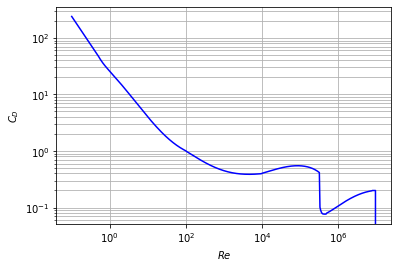

In [14]:
# chapter1/programs_and_modules/CDsphere.py

from numpy import logspace, zeros

# Define the function cd_sphere
def cd_sphere(Re):
    "This function computes the drag coefficient of a sphere as a function of the Reynolds number Re."
    # Curve fitted after fig . A -56 in Evett and Liu: "Fluid Mechanics and Hydraulics"
    
    from numpy import log10, array, polyval
    
    if Re <= 0.0:
        CD = 0.0
    elif Re > 8.0e6:
        CD = 0.2
    elif Re > 0.0 and Re <= 0.5:
        CD = 24.0/Re
    elif Re > 0.5 and Re <= 100.0:
        p = array([4.22, -14.05, 34.87, 0.658])
        CD = polyval(p, 1.0/Re) 
    elif Re > 100.0 and Re <= 1.0e4:
        p = array([-30.41, 43.72, -17.08, 2.41])
        CD = polyval(p, 1.0/log10(Re))
    elif Re > 1.0e4 and Re <= 3.35e5:
        p = array([-0.1584, 2.031, -8.472, 11.932])
        CD = polyval(p, log10(Re))
    elif Re > 3.35e5 and Re <= 5.0e5:
        x1 = log10(Re/4.5e5)
        CD = 91.08*x1**4 + 0.0764
    else:
        p = array([-0.06338, 1.1905, -7.332, 14.93])
        CD = polyval(p, log10(Re))
    return CD

# Calculate drag coefficient
Npts = 500
Re = logspace(-1, 7, Npts, True, 10)
CD = zeros(Npts)
i_list = range(0, Npts-1)
for i in i_list:
    CD[i] = cd_sphere(Re[i])

# Make plot
from matplotlib import pyplot
pyplot.plot(Re, CD, '-b')
font = {'size' : 16}
pyplot.rc('font', **font)
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('$Re$')
pyplot.ylabel('$C_D$')
pyplot.grid('on', 'both', 'both')
pyplot.savefig('example_sphere.png', transparent=True)
pyplot.show()

ERROR: Could not find a version that satisfies the requirement odespy (from versions: none)
ERROR: No matching distribution found for odespy


In [20]:
# chapter1/programs_and_modules/ParticleMotion2D.py;DragCoefficientGeneric.py @ git@lrhgit/tkt4140/allfiles/digital_compendium/chapter1/programs_and_modules/DragCoefficientGeneric.py;cdclgolfball.py @ git@lrhgit/tkt4140/allfiles/digital_compendium/chapter1/programs_and_modules/cdclgolfball.py;

# from DragCoefficientGeneric import cd_sphere
# from cdclgolfball import cdcl  

from matplotlib.pyplot import *
import numpy as np
import odespy

g = 9.81      # Gravity [m/s^2]
nu = 1.5e-5   # Kinematical viscosity [m^2/s]
rho_f = 1.20  # Density of fluid [kg/m^3]
rho_s = 1275  # Density of sphere [kg/m^3]
d = 41.0e-3   # Diameter of the sphere [m]
v0 = 50.0     # Initial velocity [m/s]
vfx = 0.0     # x-component of fluid's velocity
vfy = 0.0     # y-component of fluid's velocity

nrpm = 3500   # no of rpm of golf ball

# smooth ball
def f(z, t):
    """4x4 system for smooth sphere with drag in two directions."""
    zout = np.zeros_like(z)
    C = 3.0*rho_f/(4.0*rho_s*d)
    vrx = z[2] - vfx
    vry = z[3] - vfy
    vr = np.sqrt(vrx**2 + vry**2)
    Re = vr*d/nu
    CD = cd_sphere(Re) # using the already defined function
    zout[:] = [z[2], z[3], -C*vr*(CD*vrx), C*vr*(-CD*vry) - g]
    return zout 

# golf ball without lift
def f2(z, t):
    """4x4 system for golf ball with drag in two directions."""
    zout = np.zeros_like(z)
    C = 3.0*rho_f/(4.0*rho_s*d)
    vrx = z[2] - vfx
    vry = z[3] - vfy
    vr = np.sqrt(vrx**2 + vry**2)
    Re = vr*d/nu
    CD, CL = cdcl(vr, nrpm)
    zout[:] = [z[2], z[3], -C*vr*(CD*vrx), C*vr*(-CD*vry) - g]
    return zout 

# golf ball with lift
def f3(z, t):
    """4x4 system for golf ball with drag and lift in two directions."""
    zout = np.zeros_like(z)
    C = 3.0*rho_f/(4.0*rho_s*d)
    vrx = z[2] - vfx
    vry = z[3] - vfy
    vr = np.sqrt(vrx**2 + vry**2)
    Re = vr*d/nu
    CD, CL = cdcl(vr, nrpm)
    zout[:] = [z[2], z[3], -C*vr*(CD*vrx + CL*vry), C*vr*(CL*vrx - CD*vry) - g]
    return zout 


# main program starts here

T = 7   # end of simulation
N = 60  # no of time steps
time = np.linspace(0, T, N+1)

N2 = 4
alfa = np.linspace(30, 15, N2)   # Angle of elevation [degrees]
angle = alfa*np.pi/180.0 # convert to radians

legends=[]
line_color=['k','m','b','r']
figure(figsize=(20, 8))
hold('on')
LNWDT=4; FNT=18
rcParams['lines.linewidth'] = LNWDT; rcParams['font.size'] = FNT

# computing and plotting

# smooth ball with drag
for i in range(0,N2):
    z0 = np.zeros(4)
    z0[2] = v0*np.cos(angle[i])
    z0[3] = v0*np.sin(angle[i])
    solver = odespy.RK4(f)
    solver.set_initial_condition(z0)
    z, t = solver.solve(time)
    plot(z[:,0], z[:,1], ':', color=line_color[i])
    legends.append('angle='+str(alfa[i])+', smooth ball')
    
# golf ball with drag
for i in range(0,N2):
    z0 = np.zeros(4)
    z0[2] = v0*np.cos(angle[i])
    z0[3] = v0*np.sin(angle[i])
    solver = odespy.RK4(f2)
    solver.set_initial_condition(z0)
    z, t = solver.solve(time)
    plot(z[:,0], z[:,1], '-.', color=line_color[i])
    legends.append('angle='+str(alfa[i])+', golf ball')
     
# golf ball with drag and lift
for i in range(0,N2):
    z0 = np.zeros(4)
    z0[2] = v0*np.cos(angle[i])
    z0[3] = v0*np.sin(angle[i])
    solver = odespy.RK4(f3)
    solver.set_initial_condition(z0)
    z, t = solver.solve(time)
    plot(z[:,0], z[:,1], '.', color=line_color[i])
    legends.append('angle='+str(alfa[i])+', golf ball (with lift)')
 
legend(legends, loc='best', frameon=False)
xlabel('x [m]')
ylabel('y [m]')
axis([0, 250, 0, 50])
savefig('example_particle_motion_2d_2.png', transparent=True)
show()

ModuleNotFoundError: No module named 'odespy'

In [25]:
def check_angle_spin(angle, vel, dist, height):
    spin = abs(angle-8)*250 + 1000

    if spin <= 2500 and vel >=100:
        dist += 55
    elif spin <= 2500 and vel <100 and vel >= 70:
        dist += 25
    elif spin <= 2500 and vel <70:
        dist += 1
        
    elif spin > 2500 and spin < 4500 and vel >=100:
        dist += 15
        height +=10
    elif spin < 2500 and spin < 4500 and vel <100 and vel >= 70:
        dist += 7
        height+=10
    elif spin < 2500 and spin < 4500 and vel <70:
        dist += 5
        height+=5
        
    elif spin >= 4500 and vel >=100:
        dist -= 35
        height+=15
    elif spin >= 4500 and vel <100 and vel >= 70:
        dist -= 12
        height+=15
    elif spin >= 4500 and vel <70:
        dist += 9
        height+=10
    return dist, height
guide_RPM = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
vel_list =   [60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
# di_list = list_angle
# for spin, vel , dist in zip(angle_list, vel_list, di_list):
#     print(dist)
#     dist = check_angle_spin(spin, vel, dist)
#     print(dist)      
#     elif angle =< 10:
#         spin = 1500
#     elif angle =< 12:
#         spin = 2000
#     elif angle =< 14:
#         spin = 2500    
#     elif angle =< 16:
#         spin = 3000

In [40]:
guide_angles = [8, 10, 12, 14, 16, 18, 20, 22, 24, 26]
guide_angles = [15, 20, 25, 30,    30, 20, 20, 20, ]

for angle in guide_angles:
    spin = abs(angle-8)*250 + 2000

    print(spin)


3750
5000
6250
7500
7500
5000
5000
5000


In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def cdcl(v, nrpm):
    """Gives the value of the drag and lift coefficients as function of velocity and spin.
    Is only valid for velocities between 13.7 and 88.1 m/s, and spins between 2000 and 6000 rpm.
    The value is determined with linear interpolation of the data given by Bearman and Harvey, 
    Golf Ball Aerodynamics, volume 27, Aeronautival Quarterly, 1976."""
    
    from numpy import array, linspace
    from scipy.interpolate import interp2d
    import sys
    
    if (v<13.7 or v>88.1):
        sys.exit('v is out of bounds. Must be between 13.7 and 88.41 m/s.')
        return
    
    if (nrpm<2000 or nrpm>6000):
        sys.exit('nrpm is out of bounds. Must be between 2000 and 6000 rpm.')
        return
    
    v0 = array([13.7, 21.6, 29.9, 38.4, 46.9, 55.2, 63.1, 71.9, 80.2, 88.1])
    nrpm0 = linspace(2000,6000,21)
    
    CD = array([[0.3624,0.2885,0.2765,0.2529,0.2472,0.2481,0.2467,0.2470,0.2470,0.2470],[0.3806,0.3102,0.2853,0.2590,0.2507,0.2498,0.2485,0.2486,0.2484,0.2484],[0.3954,0.3288,0.2937,0.2649,0.2543,0.2516,0.2504,0.2502,0.2497,0.2497],[0.4070,0.3443,0.3018,0.2708,0.2580,0.2535,0.2522,0.2518,0.2511,0.2511],[0.4153,0.3566,0.3095,0.2765,0.2617,0.2556,0.2541,0.2534,0.2524,0.2524],[0.4203,0.3658,0.3169,0.2822,0.2655,0.2578,0.2560,0.2550,0.2538,0.2538],[0.4120,0.3719,0.3240,0.2876,0.2693,0.2602,0.2579,0.2566,0.2551,0.2551],[0.3960,0.3749,0.3308,0.2930,0.2732,0.2627,0.2599,0.2582,0.2565,0.2565],[0.3876,0.3766,0.3372,0.2983,0.2772,0.2653,0.2619,0.2598,0.2578,0.2578],[0.4100,0.3854,0.3433,0.3034,0.2811,0.2681,0.2639,0.2614,0.2592,0.2592],[0.4288,0.4003,0.3490,0.3084,0.2852,0.2710,0.2659,0.2630,0.2605,0.2605],[0.4445,0.4082,0.3544,0.3133,0.2893,0.2741,0.2680,0.2646,0.2619,0.2619],[0.4575,0.4153,0.3595,0.3180,0.2934,0.2772,0.2701,0.2662,0.2632,0.2632],[0.4682,0.4215,0.3643,0.3227,0.2976,0.2806,0.2722,0.2678,0.2646,0.2646],[0.4772,0.4269,0.3687,0.3272,0.3019,0.2840,0.2743,0.2694,0.2659,0.2659],[0.4848,0.4314,0.3728,0.3316,0.3062,0.2876,0.2765,0.2710,0.2673,0.2673],[0.4914,0.4350,0.3765,0.3358,0.3105,0.2913,0.2787,0.2726,0.2686,0.2686],[0.4976,0.4377,0.3799,0.3400,0.3149,0.2952,0.2809,0.2742,0.2700,0.2700],[0.5039,0.4395,0.3830,0.3440,0.3194,0.2992,0.2831,0.2758,0.2713,0.2713],[0.5105,0.4405,0.3858,0.3479,0.3239,0.3034,0.2854,0.2774,0.2727,0.2727],[0.5180,0.4406,0.3882,0.3517,0.3285,0.3076,0.2877,0.2790,0.2740,0.2740]])
    CL = array([[0.1040,0.1846,0.2460,0.1984,0.1762,0.1538,0.1418,0.1360,0.1280,0.1276],[0.1936,0.2318,0.2590,0.2089,0.1824,0.1603,0.1476,0.1405,0.1321,0.1324],[0.2608,0.2694,0.2715,0.2191,0.1886,0.1668,0.1533,0.1450,0.1362,0.1367],[0.3090,0.2986,0.2835,0.2289,0.1949,0.1731,0.1589,0.1494,0.1403,0.1404],[0.3418,0.3205,0.2947,0.2384,0.2011,0.1794,0.1646,0.1539,0.1444,0.1436],[0.3624,0.3362,0.3049,0.2475,0.2073,0.1856,0.1702,0.1584,0.1485,0.1464],[0.3743,0.3470,0.3140,0.2562,0.2135,0.1916,0.1757,0.1629,0.1526,0.1488],[0.3808,0.3541,0.3217,0.2644,0.2197,0.1976,0.1813,0.1673,0.1567,0.1508],[0.3854,0.3584,0.3280,0.2722,0.2259,0.2035,0.1868,0.1718,0.1608,0.1524],[0.3915,0.3614,0.3325,0.2795,0.2322,0.2092,0.1923,0.1763,0.1649,0.1539],[0.4005,0.3640,0.3347,0.2862,0.2384,0.2149,0.1977,0.1807,0.1690,0.1582],[0.4010,0.3696,0.3380,0.2925,0.2446,0.2205,0.2032,0.1852,0.1731,0.1624],[0.4026,0.3748,0.3412,0.2982,0.2508,0.2259,0.2086,0.1897,0.1772,0.1666],[0.4050,0.3797,0.3440,0.3033,0.2570,0.2313,0.2139,0.1941,0.1813,0.1707],[0.4084,0.3845,0.3468,0.3078,0.2632,0.2366,0.2193,0.1986,0.1854,0.1749],[0.4130,0.3894,0.3496,0.3119,0.2695,0.2418,0.2246,0.2031,0.1895,0.1791],[0.4192,0.3947,0.3527,0.3149,0.2757,0.2469,0.2298,0.2076,0.1936,0.1833],[0.4271,0.4004,0.3563,0.3184,0.2819,0.2518,0.2351,0.2120,0.1977,0.1875],[0.4371,0.4069,0.3607,0.3233,0.2881,0.2567,0.2403,0.2165,0.2018,0.1916],[0.4494,0.4143,0.3660,0.3300,0.2943,0.2615,0.2455,0.2210,0.2059,0.1958],[0.4644,0.4227,0.3724,0.3393,0.3005,0.2662,0.2507,0.2254,0.2100,0.2000]])
    
    cd = interp2d(v0, nrpm0, CD, kind='linear')
    cl = interp2d(v0, nrpm0, CL, kind='linear')
    return cd(v, nrpm), cl(v, nrpm)

def main_dist_time(vel, angle):
    spin = abs(angle-8)*250 + 2000
    if spin < 2000:
        spin = 2000
    elif spin> 6000:
        spin = 6000
    c , cl = cdcl(vel, spin)

    # Drag coefficient, projectile radius (m), area (m2) and mass (kg).
#     c = 0.47            # drag coefficent -> An average golf ball will have a drag coefficient of, 0.24 < CD < 0.7
    r = 0.02135         # radius diameter(m) = 42.7mm --> r=d/2 convert to meter = 0.02135
    A = np.pi * r**2    # area
    m = 0.04593         # mass(kg), golf_ball = 45.93 grams

    # Air density (kg.m-3), acceleration due to gravity (m.s-2).
    rho_air = 1.28
    g = 9.81

    # For convenience, define  this constant.
    k = 0.5 * c*cl * rho_air * A

    # Initial speed and launch angle (from the horizontal).
    v0 =  vel #170
    phi0 = np.radians(angle)

    def deriv(t, u):
        x, xdot, z, zdot = u
        speed = np.hypot(xdot, zdot)
        xdotdot = -k/m * speed * xdot
        zdotdot = -k/m * speed * zdot - g
        return xdot, xdotdot, zdot, zdotdot

    # Initial conditions: x0, v0_x, z0, v0_z.
    u0 = 0, v0 * np.cos(phi0), 0., v0 * np.sin(phi0)

    # Integrate up to tf unless we hit the target sooner.
    t0, tf = 0, 50

    def hit_target(t, u):
        # We've hit the target if the z-coordinate is 0.
        return u[2]

    # Stop the integration when we hit the target.
    hit_target.terminal = True

    # We must be moving downwards (don't stop before we begin moving upwards!)
    hit_target.direction = -1

    def max_height(t, u):
        # The maximum height is obtained when the z-velocity is zero.
        return u[3]

    soln = solve_ivp(deriv, (t0, tf), u0, dense_output=True,
                     events=(hit_target, max_height))
#     print(f'velocity: {vel}, angle: {angle}')
# #     print(soln)
#     print('Time to target = {:.2f} s'.format(soln.t_events[0][0]))
#     print('Time to highest point = {:.2f} s'.format(soln.t_events[1][0]))

    # A fine grid of time points from 0 until impact time.
    t = np.linspace(0, soln.t_events[0][0], 1000)

    # Retrieve the solution for the time grid and plot the trajectory.
    sol = soln.sol(t)
    x, z = sol[0], sol[2]
#     print('Range to target, xmax = {:.2f} m'.format(x[-1]))
#     print('Maximum height, zmax = {:.2f} m'.format(max(z)))
#     print('.......................')
#     plt.plot(x, z)
#     plt.xlabel('x /m')
#     plt.ylabel('z /m')
#     plt.show()
    top_h = max(z)
    spin_x = 1
    spin_y = 1
    dif_x = 1
    dif_x2 = 1
    # creating .obj (3D) file...
    f = open("trajectory.obj", "w")
    for i in range(x.shape[0]):
    #     f.write(f"v {x[i]} 0 {z[i]}\n")
    #     cur_m = cur_m/1.045
    #     cur_n = cur_n*1.0002
        dif_x2 /= 1.045
        dif_x *= 1.0002
        spin_y = abs(int(spin_y + dif_x+dif_x2))
#         print(spin_y)
#         print(z[i])
        f.write(f"v {x[i]} {-z[i]/10} {z[i]}\n")
    f.close()
#     x[-1], top_h = check_angle_spin(angle, vel, x[-1], top_h)
    print(x[-1], top_h)
    return x[-1], top_h



In [24]:
import csv

if __name__ == "__main__":
    
    
    guide_angles = [8, 10, 12, 14, 16, 18, 20, 22, 24, 26]
    guide_RPM = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
    vel_list =   [60, 65, 70, 75, 80, 85, 90, 95, 100, 105]

    
    angle_list = [15, 20, 25, 30,    30, 20, 20, 20, ]
    vel_list =   [87, 87, 87, 87,    70, 70, 60, 50, ]
    vel_list =   [87, 87, 87, 87, 87, 87, 87, 87, 87, 87]
    vel_list =   [60, 65, 70, 75, 80, 85, 90, 95, 100, 105]
    vel_list =   [40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
    
#     vel = 88
#     angle = 17.7
#     list_angle= []
    row_list = []
    row_list2 = []
    for vel in vel_list:
#         print(vel)
        list_angle= []
        list_angle2= []
        for angle in  guide_angles:
            distance, height = main_dist_time(vel, angle)
#             print(height)
            list_angle.append(int(distance))
            list_angle2.append(int(height))
#             dist = check_angle_spin(angle, vel, distance)

#         print(vel, dist)
        row_list.append(list_angle)
        row_list2.append(list_angle2)
        
header = "Velocity ", "Angle"
with open('test.csv', 'w') as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerow(header)
    for row in row_list:
        writer.writerow([i for i in row])
        
with open('test2.csv', 'w') as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerow(header)
    for row in row_list2:
        writer.writerow([i for i in row])

43.68579322231824 1.55689439814764
53.496790122921496 2.40767634634643
62.65461129250576 3.424709100082071
71.10896419241189 4.596369704497416
78.83296070354697 5.910380014804526
85.83813677347553 7.35510261846629
92.14572482469367 8.919271537252978
97.75935382195375 10.590828081072555
102.2615190935327 12.329593784324008
107.33510673564216 14.237154447089654
55.03420063585871 1.9659245780726748
67.36200451527007 3.0394219992253353
78.86062856251739 4.322172711345793
89.44326050425676 5.798511053560675
99.04187996975838 7.450989949930072
107.6244947929763 9.261567626815456
115.16082048697393 11.210842601659856
121.6467844727477 13.27948271200584
126.91005988066902 15.435327975413578
133.0700641087422 17.812161196036968
67.63391624575584 2.4214761352879117
82.70337697060805 3.741608726273765
96.72840808253342 5.317681415013574
109.59229721957291 7.12959851477895
121.19732919387882 9.154681769730471
131.47854238046995 11.368569167945616
140.37778386271003 13.744556160793962
147.899857571

In [16]:
optionsTable = row_list
# print(row_list)
header = ['a', 'b' , 'x']
with open('test.csv', 'w') as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerow(header)
    for row in optionsTable:
        print(row)

        writer.writerow([i for i in row])

[64, 74, 82, 89, 95, 100, 105, 109, 112, 115]
[71, 81, 90, 97, 104, 109, 114, 118, 121, 124]
[78, 89, 98, 106, 112, 118, 122, 126, 129, 132]
[85, 96, 105, 113, 120, 125, 130, 134, 137, 140]
[92, 103, 113, 121, 127, 133, 138, 142, 145, 147]
[98, 110, 120, 128, 134, 140, 145, 149, 152, 155]
[104, 116, 126, 134, 141, 147, 152, 156, 159, 161]
[110, 123, 133, 141, 148, 153, 158, 162, 165, 168]
[116, 129, 139, 147, 154, 160, 164, 168, 171, 174]
[122, 134, 145, 153, 160, 166, 170, 174, 177, 179]


In [13]:
import csv

with open('file.csv', 'w') as f:
    writer = csv.writer(f)
    header = ['year','month','day'] # first row
    blank_row = ['\n'] # second row (blank row)
    row1 = ['2020','Jul','23'] # 3rd row
  
    writer.writerow(header) # write the first row
    writer.writerow(blank_row) # write the blank row to skip a line
    writer.writerow(row1) # write the third row

PermissionError: [Errno 13] Permission denied: 'file.csv'

In [48]:

import csv

with open ("file.csv", "r") as source:
    reader = csv.reader(source)
    data = []
    print(reader)
    for row in reader:
        data.append(row)
    print(data)
#     result1 = data[2] [1]
#     result2 = data[2] [2]
#     print (result1, result2)

[['year', 'month', 'day'], [], ['\n'], [], ['2020', 'Jul', '23'], []]


In [ ]:
data = dict()
# first read the output file in (if one exists already)
try:
    with open("output file.csv", encoding="utf8") as f_out:
        for row in csv.DictReader(f_out): data[row['id']] = row
except OSError: pass

# now add the new rows from the input file; rows with existing id are replaced
with open("input file.csv", encoding="utf8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        if row['MyColumn'] == '0': data[row['id']] = row

with open("output file.csv", "w", encoding="utf8") as f_out:
    writer = csv.DictWriter(f_out, fieldnames=reader.fieldnames)
    writer.writeheader()
    for row in data: writer.writerow(data[row])

In [51]:
from PIL import Image, ImageDraw, ImageFont

x1,y1,x2,y2, xy = 100, 1000, 1000, 100, 300

# get an image
with Image.open("/Users/jakhon37/pyProjects/3dRotation/data/res/im2_test.jpg").convert("RGBA") as im:
# /Users/jakhon37/pyProjects/3dRotation/data/res
    # make a blank image for the text, initialized to transparent text color
    txt = Image.new("RGBA", im.size, (255, 255, 255, 0))

    # get a font
    fnt = ImageFont.truetype("/Users/jakhon37/pyProjects/3dRotation/data/res/font/Amble-Bold.ttf", 40)
    # get a drawing context
    d = ImageDraw.Draw(txt)
#     shape = [(40, 40), (w - 10, h - 10)]
    shape = [(40, 40), (145, 145)]

    # draw text, half opacity
    d.text((10, 10), "Hello", font=fnt, fill=(255, 255, 255, 128))
    # draw text, full opacity
    d.text((10, 60), "World", font=fnt, fill=(255, 255, 255, 255))
#     d.line((x1,y1,x2,y2), fill=(55, 155, 255, 228), width=50 )
    d.rectangle(((x1,y1),(x2,y2)), outline = (55, 155, 255, 128), fill=(255, 255, 255, 128), width=10 )
#     d.arc((x1,y1,x2,y2), (10),(115), fill="pink", width=200)
#     d.arc(shape, start = 45, end = 135, fill ="pink", width=200)

    out = Image.alpha_composite(im, txt)
    
    out.show()

In [ ]:
def draw_line():
    addLine = ImageDraw.Draw(base)
    addLine.line((x1,y1,x2,y2), fill=(0,255))

In [35]:
# importing image object from PIL
import math
from PIL import Image, ImageDraw
w, h = 220, 190
shape = [(40, 40), (w - 10, h - 10)]
# creating new Image object
img = Image.new("RGB", (w, h))
# create rectangle image
img1 = ImageDraw.Draw(img)
img1.arc(shape, start = 20, end = 130, fill ="pink")
img.show()

In [ ]:
from PIL import Image, ImageFont, ImageDraw

from supershot.aws_proc_drive import *

import os
import copy


# 폰트 모양, 사이즈 결정
def define_fnt(size):
    fnt = ImageFont.truetype(
        "./supershot/font/Pretendard-Regular.ttf",
        size, encoding="utf-8"
    )
    return fnt


def draw_rect(frame, s_point, f_point, color, thickness):
    overlay = frame.copy()
    x, y, w, h = 1080-410, 15, 405, 550   
    cv2.rectangle(overlay, (x, y), (x+w, y+h), (100, 200, 0), -1)  
    alpha = 0.4  # Transparency factor.
    frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)
    return frame 
def draw_line(frame, s_point, e_point, color, thickness):
#     cv2.line(im, start_point, end_pointl, color=(255, 50, 50 ), thickness=3)
    draw.line([(x1,y1),(x2,y2)],fill = (255, 255, 255, 0))


# 화면 내 문구 출력
def text_define(frame, text, x, y):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_pil = Image.fromarray(frame)
    frame_draw = ImageDraw.Draw(frame_pil)
    frame_draw.text((x, y), text, font=define_fnt(32), fill=(25, 255, 255))
    frame = np.array(frame_pil)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    return frame

def put_text(frame, data, f_v, f_a):
    f_d, f_h, f_t = calc_trajectory(f_v, f_a, 0.001)
    frame = text_define(frame, str(data["shot"]), frame.shape[1] - 200, 30)
    frame = text_define(frame, "D: " + str(f_d) + " m", frame.shape[1] - 200, 80)
    frame = text_define(frame, "S: " + str(f_v) + " m/s", frame.shape[1] - 200, 130)
    frame = text_define(frame, "A: " + str(f_a) + " º", frame.shape[1] - 200, 180)
    frame = text_define(frame, str(data["line_orb"]), frame.shape[1] - 200, 230)
    frame = text_define(frame, "H: " + str(f_h) + " m", frame.shape[1] - 200, 280)
    frame = text_define(frame, "T: " + str(f_t) + " sec", frame.shape[1] - 200, 330)
    return frame

def main(im_path):
    
    im = cv2.imread(im_path)
    im_shape = im.shape
    print('image shape ',im_shape)

    if not os.path.exists(path):
        os.makedirs(path)
    im_name = (f'{path.split("/")[-1].split(".")[1]}out.jpg')
    im = cv2.imread(im_name)
    cv2.imwrite((f'{path}out{json_f["image_id"]}'), im)

print('')